# Stock Price Prediction 

### Contents

## 1. Importing Required Libraries 

Load Libraries 

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 





In [2]:
# The Below Commond Sets The Backend Of Matplotlib To The "inline" Backend 
# It Means The Output Of Plotting Commands Is Displayed inline 
%matplotlib inline 

# 2. Loading The Data 

##### 2.1. Reading And Viewing The Dataset Using Pandas 

In [3]:
df = pd.read_csv("ADANIPORTS.csv")

df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


In [4]:
# View The Dimension Of Data (df)
df.shape 

(3322, 15)

##### 2.2 Understanding The Data 

# 3. Data Preproccesing 

##### 3.1. Data Statistics 

In [5]:
# View DataFrame Summary 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3322 non-null   object 
 1   Symbol              3322 non-null   object 
 2   Series              3322 non-null   object 
 3   Prev Close          3322 non-null   float64
 4   Open                3322 non-null   float64
 5   High                3322 non-null   float64
 6   Low                 3322 non-null   float64
 7   Last                3322 non-null   float64
 8   Close               3322 non-null   float64
 9   VWAP                3322 non-null   float64
 10  Volume              3322 non-null   int64  
 11  Turnover            3322 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  3322 non-null   int64  
 14  %Deliverble         3322 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 389.4

In [6]:
# View Descriptive Statistics 

df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3.322000e+03,3.322000e+03,2.456000e+03,3.322000e+03,3322.000000
mean,344.114314,344.763019,351.608007,337.531969,344.239539,344.201626,344.853182,2.954564e+06,1.070144e+14,4.492259e+04,1.207441e+06,0.445899
std,192.936882,193.619992,198.617808,188.676614,193.187813,193.045886,193.841305,4.104227e+06,2.625564e+14,5.023124e+04,1.398640e+06,0.160496
min,108.000000,108.000000,110.450000,105.650000,108.000000,108.000000,108.340000,1.236600e+04,2.415857e+11,3.660000e+02,5.383000e+03,0.067000
25%,164.312500,164.850000,168.000000,161.600000,164.075000,164.312500,164.855000,7.493682e+05,1.817650e+13,2.083200e+04,3.212005e+05,0.332900
50%,324.700000,325.750000,331.275000,319.850000,325.000000,324.700000,325.765000,2.007292e+06,5.836041e+13,3.588150e+04,8.132775e+05,0.445650
75%,400.912500,401.000000,407.187500,395.000000,400.912500,400.912500,400.607500,3.636883e+06,1.158526e+14,5.336875e+04,1.605528e+06,0.555850
max,1307.450000,1310.250000,1324.000000,1270.000000,1308.000000,1307.450000,1302.150000,9.771788e+07,8.160988e+15,1.205984e+06,2.241652e+07,0.979800


In [7]:
df.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [8]:
# Checking For Null Value 
df.isnull().sum()

Date                    0
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                866
Deliverable Volume      0
%Deliverble             0
dtype: int64

In [9]:
# install missingno 
# ! pip install missingno

Text(0, 0.5, 'Count')

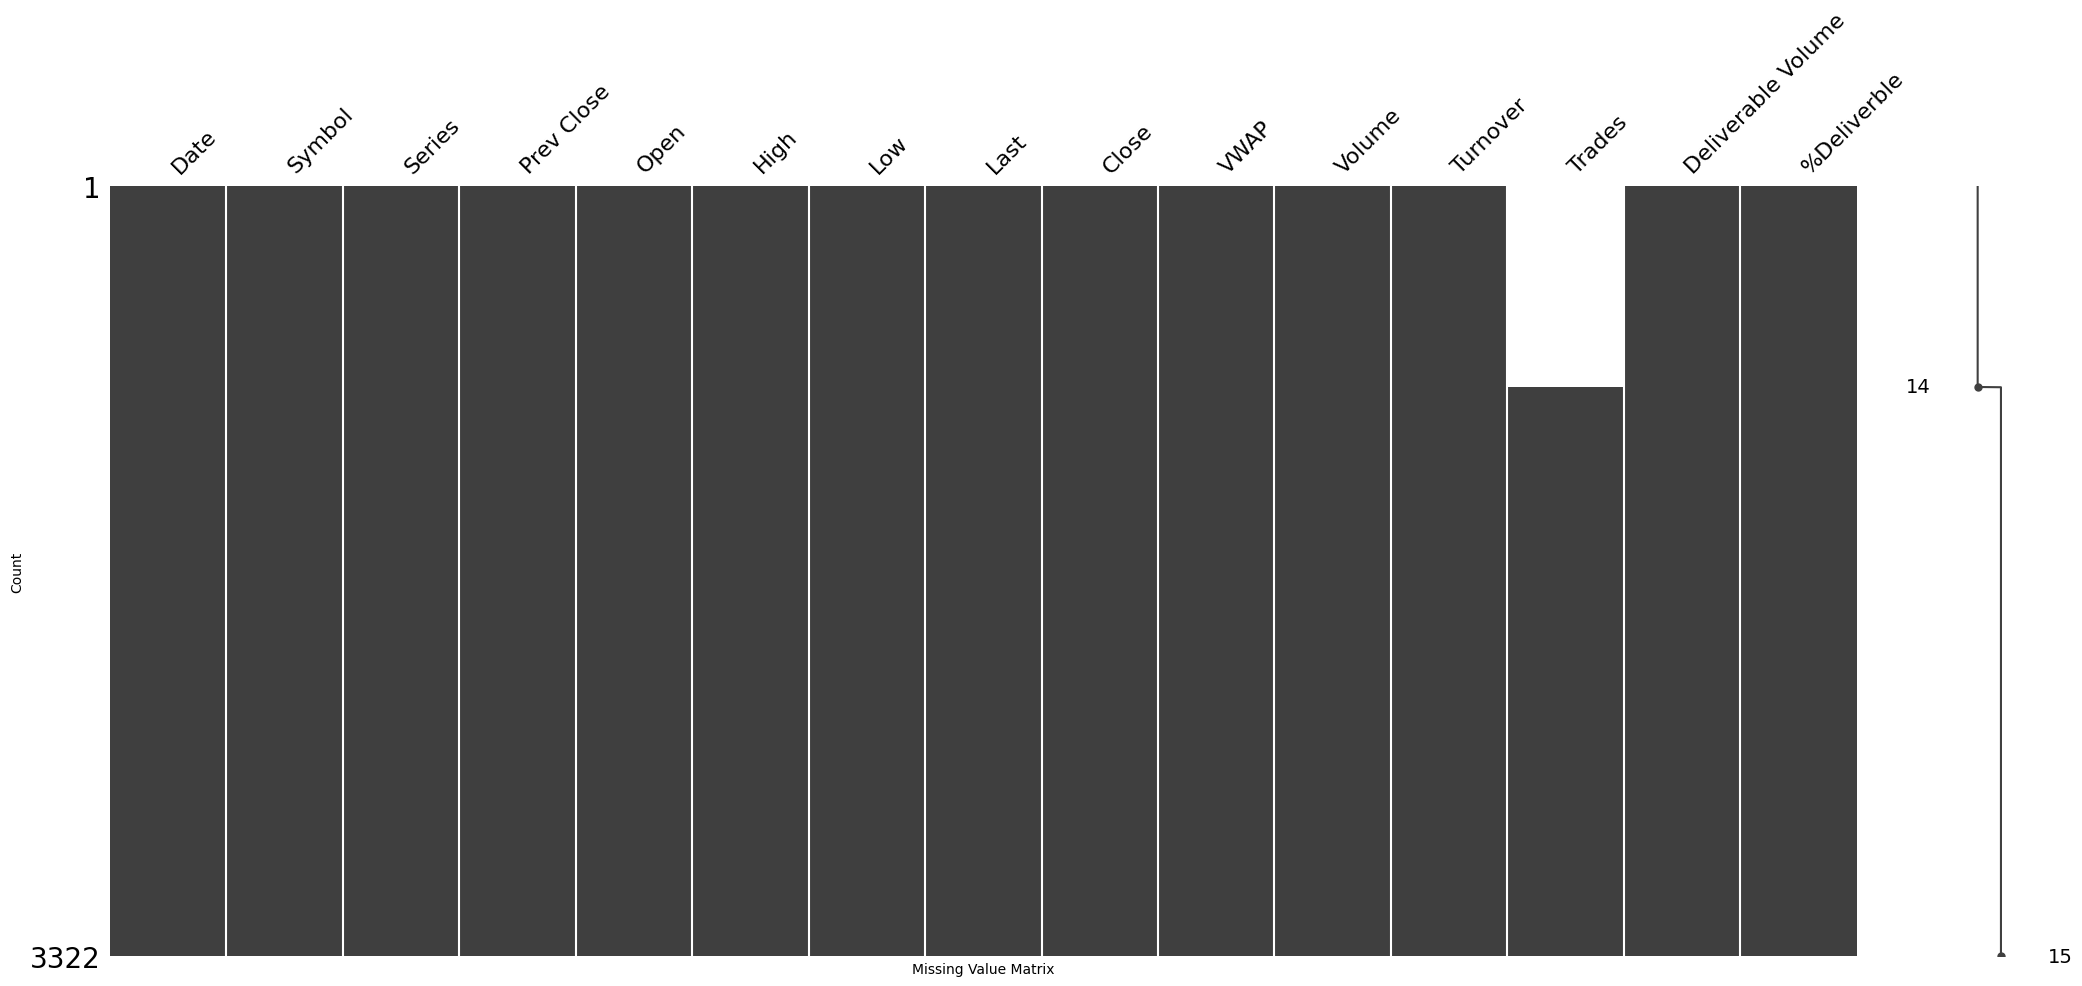

In [10]:
# Visualizing Missing Data 

import missingno as msno
msno.matrix(df)
plt.xlabel("Missing Value Matrix")
plt.ylabel("Count")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3322 non-null   object 
 1   Symbol              3322 non-null   object 
 2   Series              3322 non-null   object 
 3   Prev Close          3322 non-null   float64
 4   Open                3322 non-null   float64
 5   High                3322 non-null   float64
 6   Low                 3322 non-null   float64
 7   Last                3322 non-null   float64
 8   Close               3322 non-null   float64
 9   VWAP                3322 non-null   float64
 10  Volume              3322 non-null   int64  
 11  Turnover            3322 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  3322 non-null   int64  
 14  %Deliverble         3322 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 389.4

##### 3.2. Let's Take Any One Year's Data From The Datasets And Name It As Stockprice_One_Year. Use This Newly Created DataFrame For The Future Analysis

In [12]:
Stockprice_One_Year = df[(df["Date"]>'2011.03.31')&(df["Date"]<"2012.04.01")]
Stockprice_One_Year

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
1011,2012-01-02,MUNDRAPORT,EQ,120.05,122.80,123.75,111.00,115.00,114.70,115.90,1572363,1.822399e+13,20505.0,408586,0.2599
1012,2012-01-03,MUNDRAPORT,EQ,114.70,117.50,120.90,115.00,119.60,120.30,118.97,1385662,1.648520e+13,17541.0,651310,0.4700
1013,2012-01-04,MUNDRAPORT,EQ,120.30,121.00,123.50,118.00,122.70,122.85,120.33,1259249,1.515310e+13,10912.0,722926,0.5741
1014,2012-01-05,MUNDRAPORT,EQ,122.85,122.00,127.60,121.30,127.00,126.70,125.30,788405,9.878425e+12,10614.0,315199,0.3998
1015,2012-01-06,MUNDRAPORT,EQ,126.70,126.25,128.75,124.30,127.00,127.70,126.44,1036623,1.310736e+13,11658.0,401367,0.3872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,2012-12-24,ADANIPORTS,EQ,135.65,137.00,137.40,133.45,135.35,135.35,135.34,625551,8.466311e+12,9086.0,130048,0.2079
1258,2012-12-26,ADANIPORTS,EQ,135.35,136.00,137.50,134.40,136.10,136.40,136.28,526630,7.176719e+12,9187.0,131747,0.2502
1259,2012-12-27,ADANIPORTS,EQ,136.40,137.45,138.25,132.45,133.70,133.80,135.20,1895037,2.562180e+13,10481.0,1226084,0.6470
1260,2012-12-28,ADANIPORTS,EQ,133.80,133.50,134.95,132.05,132.55,132.85,133.24,773240,1.030240e+13,11910.0,347459,0.4494


In [13]:
Stockprice_One_Year.isnull().sum()

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [14]:
Stockprice_One_Year.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02,2.510000e+02,251.000000,2.510000e+02,251.000000
mean,126.971713,127.110558,129.536255,124.545418,126.957171,127.031275,127.067131,1.249334e+06,1.589953e+13,14506.569721,6.782246e+05,0.504702
std,10.481418,10.786215,10.995367,10.153545,10.445331,10.484404,10.515293,9.434564e+05,1.209791e+13,9069.699698,6.179199e+05,0.136432
min,108.000000,108.000000,110.450000,105.650000,108.000000,108.000000,108.340000,1.921800e+04,2.415857e+11,366.000000,5.383000e+03,0.168500
25%,119.700000,119.175000,121.875000,117.125000,119.575000,119.700000,119.340000,6.310935e+05,8.061242e+12,8346.500000,2.782465e+05,0.399150
50%,125.350000,125.500000,127.950000,123.550000,125.350000,125.400000,125.630000,1.031669e+06,1.289988e+13,12370.000000,4.915980e+05,0.499100
75%,132.500000,132.850000,136.000000,130.150000,132.450000,132.750000,133.235000,1.576300e+06,2.071907e+13,18298.000000,8.384755e+05,0.593650
max,155.400000,155.750000,157.750000,150.650000,155.400000,155.400000,153.760000,5.833743e+06,7.891366e+13,62246.000000,3.530898e+06,0.868200


In [15]:
Stockprice_One_Year.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251 entries, 1011 to 1261
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                251 non-null    object 
 1   Symbol              251 non-null    object 
 2   Series              251 non-null    object 
 3   Prev Close          251 non-null    float64
 4   Open                251 non-null    float64
 5   High                251 non-null    float64
 6   Low                 251 non-null    float64
 7   Last                251 non-null    float64
 8   Close               251 non-null    float64
 9   VWAP                251 non-null    float64
 10  Volume              251 non-null    int64  
 11  Turnover            251 non-null    float64
 12  Trades              251 non-null    float64
 13  Deliverable Volume  251 non-null    int64  
 14  %Deliverble         251 non-null    float64
dtypes: float64(10), int64(2), object(3)
memory usage: 31.4+ KB

# 4. Data Visualization  

##### 4.1. Let's Compare Stockprice_One_Year['feature_name'].plot() vs df['feature_name'].plot()  

<Axes: >

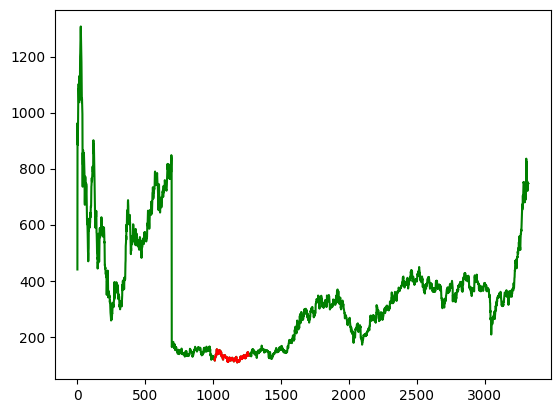

In [16]:
pl = df['Prev Close'].plot(c="green")
Stockprice_One_Year['Prev Close'].plot(ax=pl,c="red")

Obeservation :

For the Economic Year 2011 - 2012 Prev Close of Adani Port's Range is in Betwween 100-200, where as latter year it increases a lot. from which we can conclude the Company has faced positive impact  in stock market.


<Axes: >

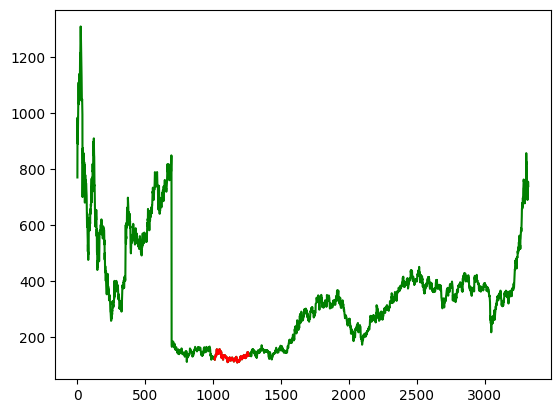

In [17]:
pl = df['Open'].plot(c="green")
Stockprice_One_Year['Open'].plot(ax=pl,c="red")

Observation :

For the Economic Year 2011 - 2012 Open of Adani Port's Range is in Betwween 100-200, where as latter year it increases a lot. from which we can conclude the Company has faced positive impact in stock market.

157.75

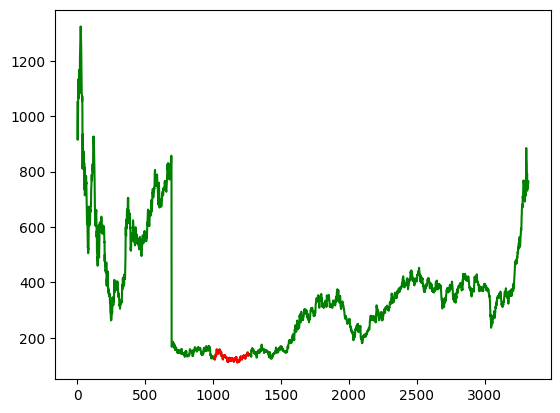

In [18]:
pl = df['High'].plot(c="green")
Stockprice_One_Year['High'].plot(ax=pl,c="red")

Stockprice_One_Year['High'].max()

Observation :

For the Economic Year 2011 - 2012 High Stock Price of Adani Port's is 157.75

150.65

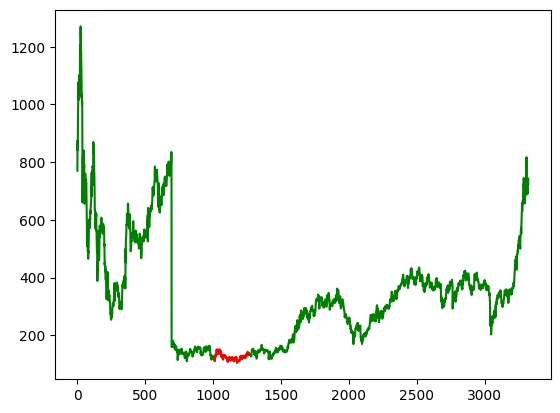

In [19]:
pl = df['Low'].plot(c="green")
Stockprice_One_Year['Low'].plot(ax=pl,c="red")

Stockprice_One_Year['Low'].max()

Observation :

For the Economic Year 2011 - 2012 Low Stock Price of Adani Port's is 150.65

(108.0, 155.4)

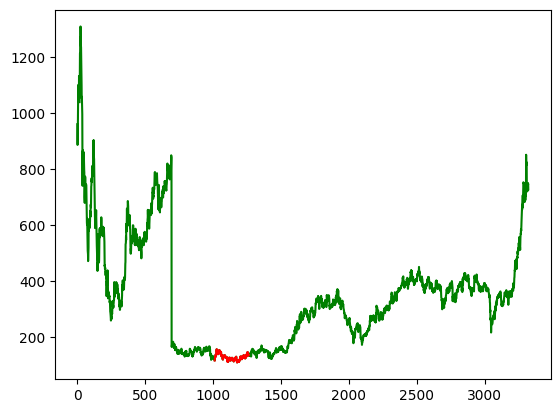

In [20]:
pl = df['Last'].plot(c="green")
Stockprice_One_Year['Last'].plot(ax=pl,c="red")

Stockprice_One_Year['Last'].min(),Stockprice_One_Year['Last'].max()

Observation :

For the Economic Year 2011 - 2012 Last of Adani Port's Range is in Betwween 108.0-155.4


(108.0, 155.4)

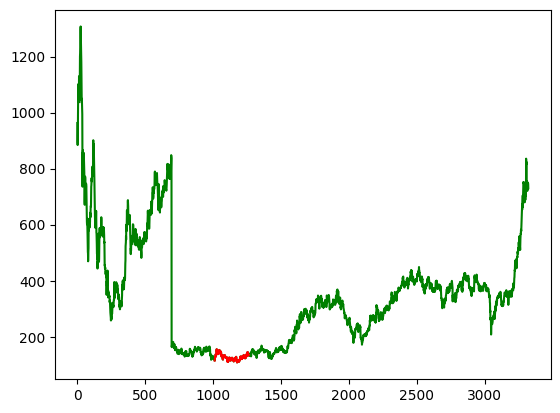

In [21]:
pl = df['Close'].plot(c="green")
Stockprice_One_Year['Close'].plot(ax=pl,c="red")

Stockprice_One_Year['Close'].min(),Stockprice_One_Year['Close'].max()

Observation :

For the Economic Year 2011 - 2012 Close of Adani Port's Range is in Betwween 108.0-155.4


(108.34, 153.76)

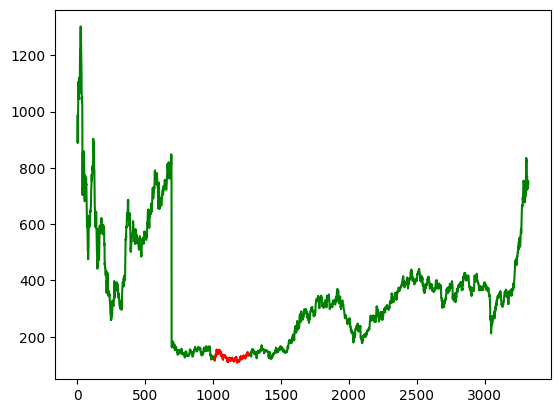

In [22]:
pl = df['VWAP'].plot(c="green")
Stockprice_One_Year['VWAP'].plot(ax=pl,c="red")

Stockprice_One_Year['VWAP'].min(),Stockprice_One_Year['VWAP'].max()

Observation :

For the Economic Year 2011 - 2012 VWAP(Volume Weighted Average Price) of Adani Port's Range is in Betwween 108.34-153.76


##### 4.2. Now, let's check wherher matplotlib's plotting is better in looks. Once the plotting is done, Check what is the impact in plots, if you execute the line of code: plt.style.use('fivethirtyeight')

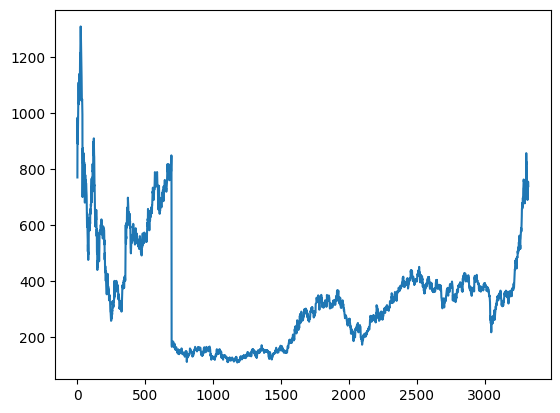

In [23]:
plt.plot(df["Open"])

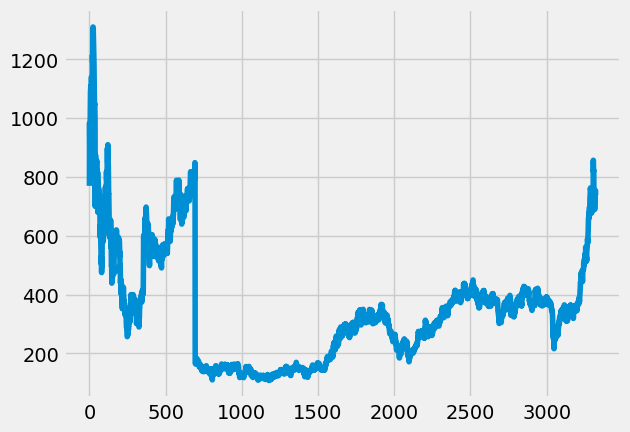

In [24]:
plt.style.use('fivethirtyeight')
plt.plot(df["Open"])

Observation :

plt.style.use("fivethirtyeight") use gives more clarity in Visualization.


##### 4.3. Let's find the Correlation between the features. make a correlation Heatmap. Write your Observations about the same.

In [25]:
Stockprice_One_Year_corr = Stockprice_One_Year.drop(columns=["Date","Symbol","Series"])
# for easy to get Correlation Heatmap 

<Axes: >

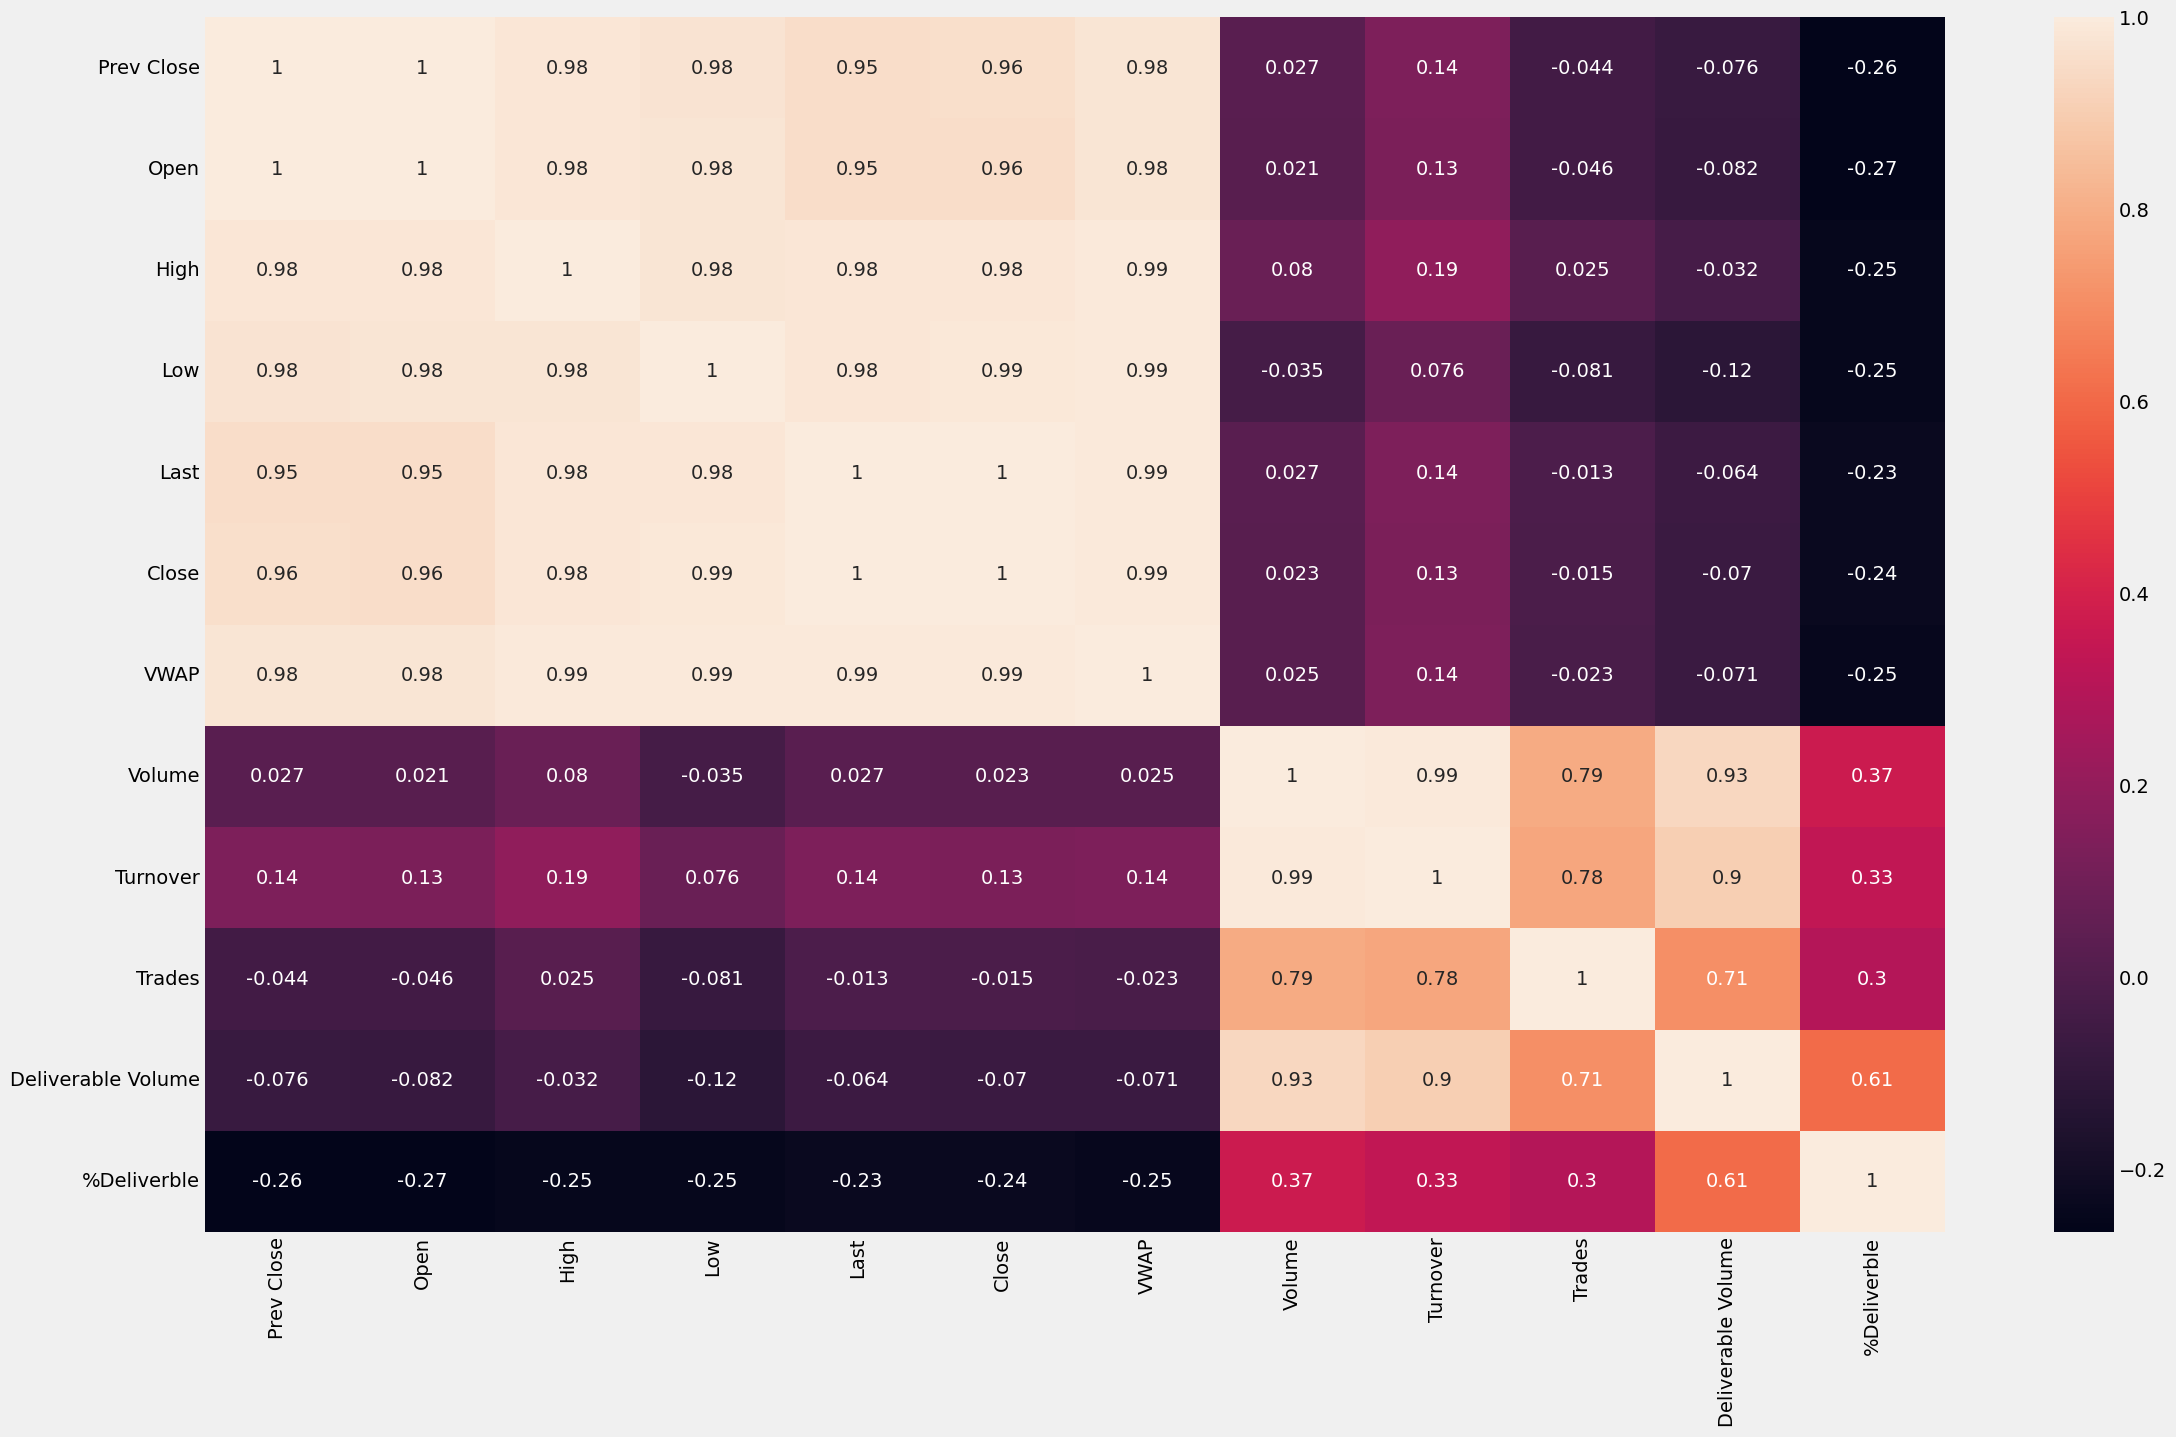

In [26]:
plt.figure(figsize=(25,15))
sns.heatmap(Stockprice_One_Year_corr.corr(method="pearson"),annot=True)

##### 4.4. How can you plot multiple features in single plot ? For Instance, Use a red line For "LOW" ,Green line for "HIGH", and Black line for "CLOSE"

<Axes: xlabel='Date'>

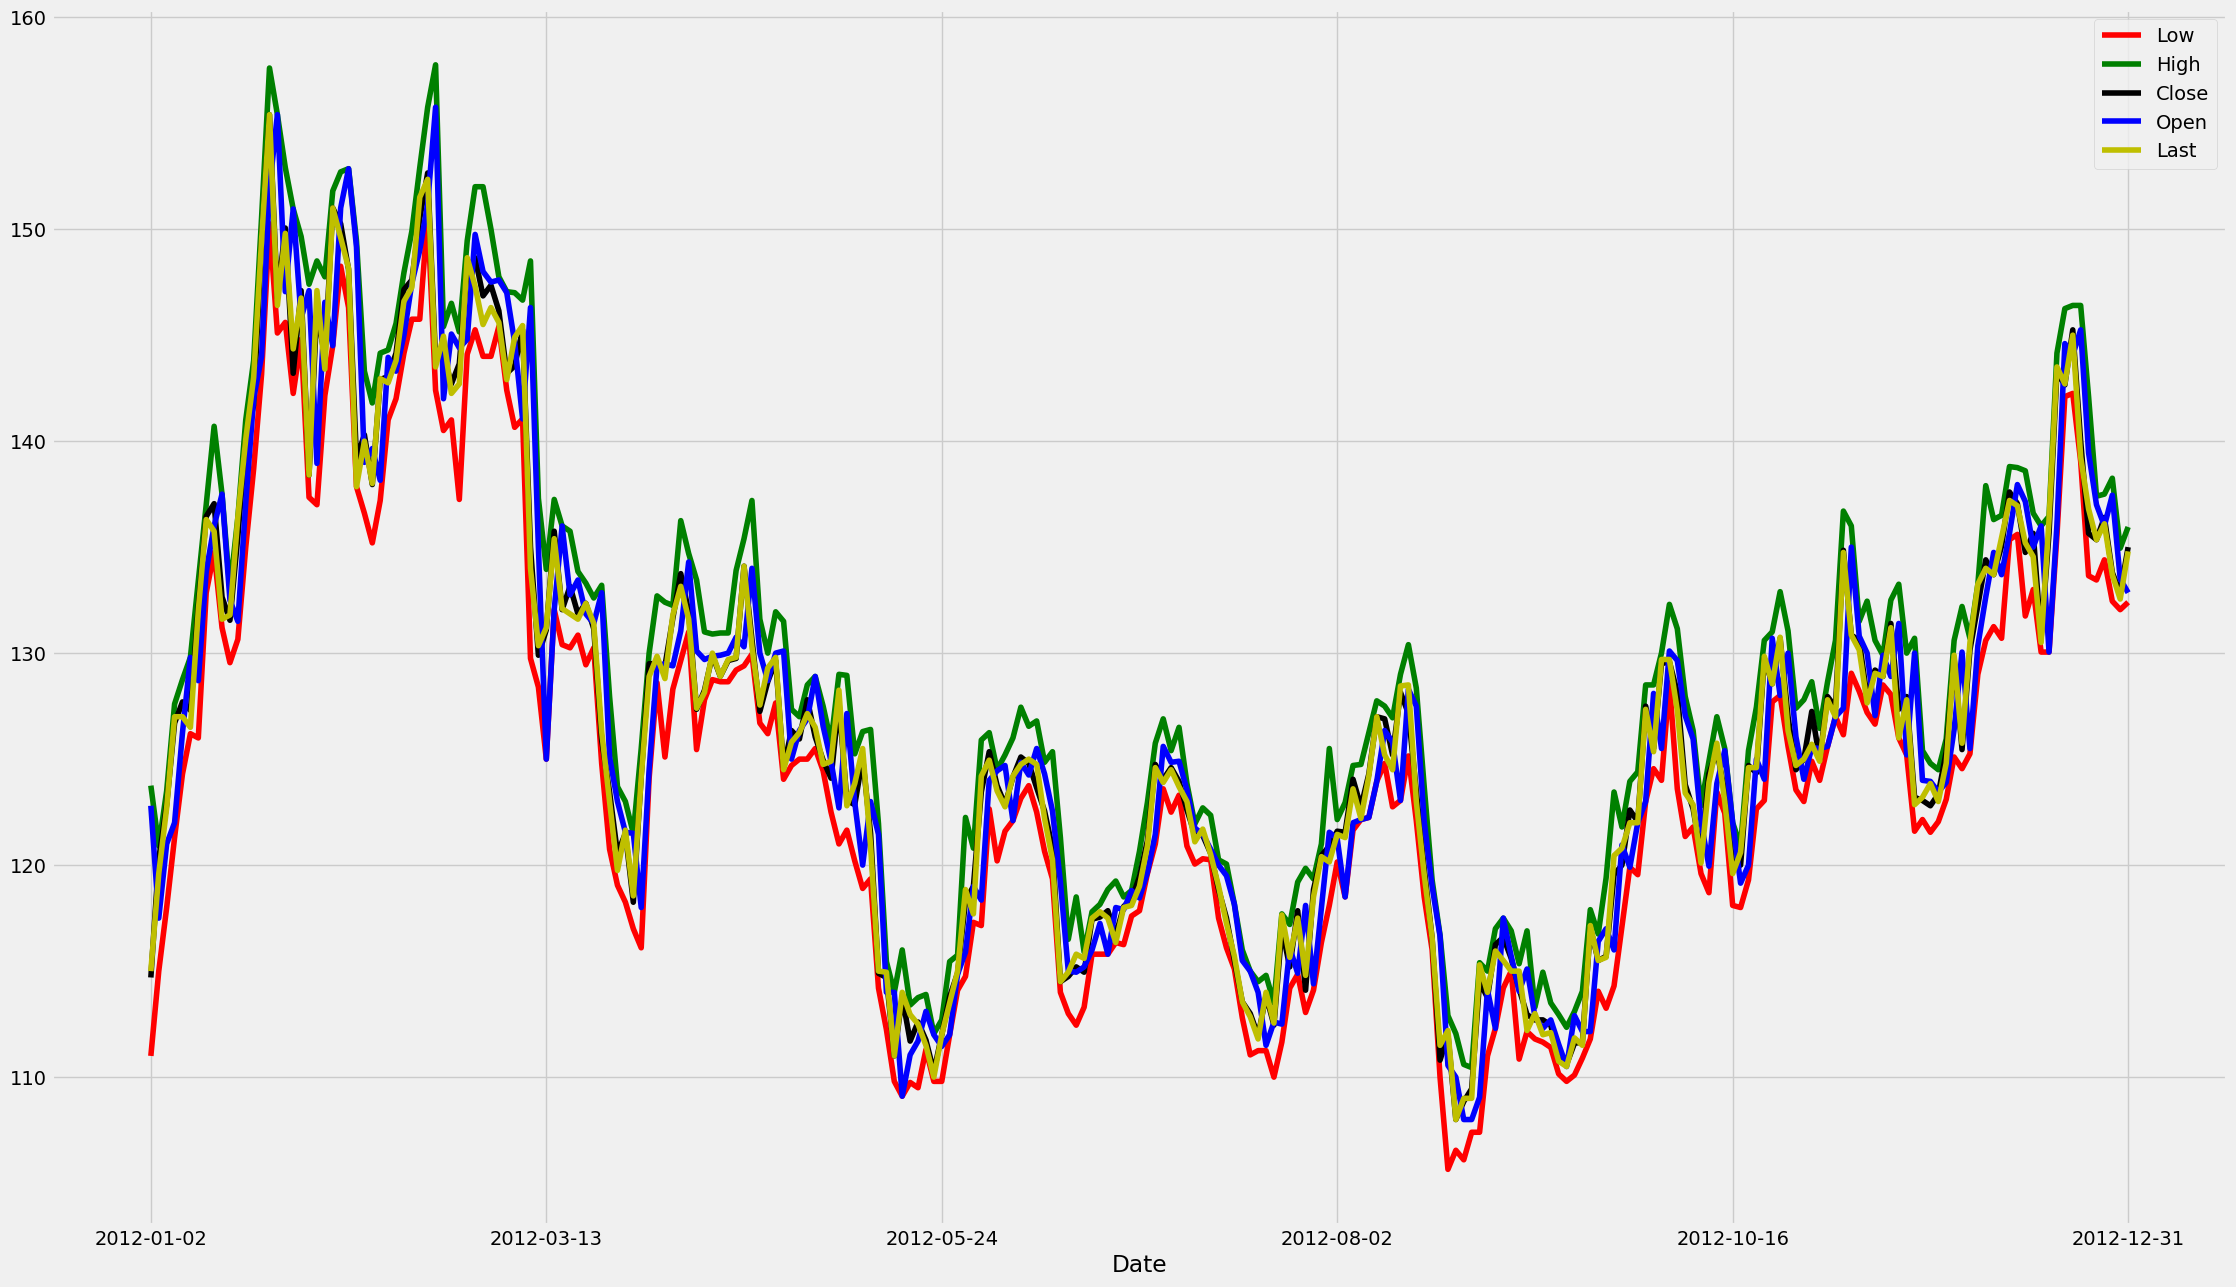

In [27]:
Stockprice_One_Year.plot(x="Date",y=["Low","High","Close","Open","Last"],color = ["r","g","k","b","y"],figsize = [25,15])

##### 4.5. Now, What does plt.fill_between() do? can you shade the region between LOW and HIGH ?

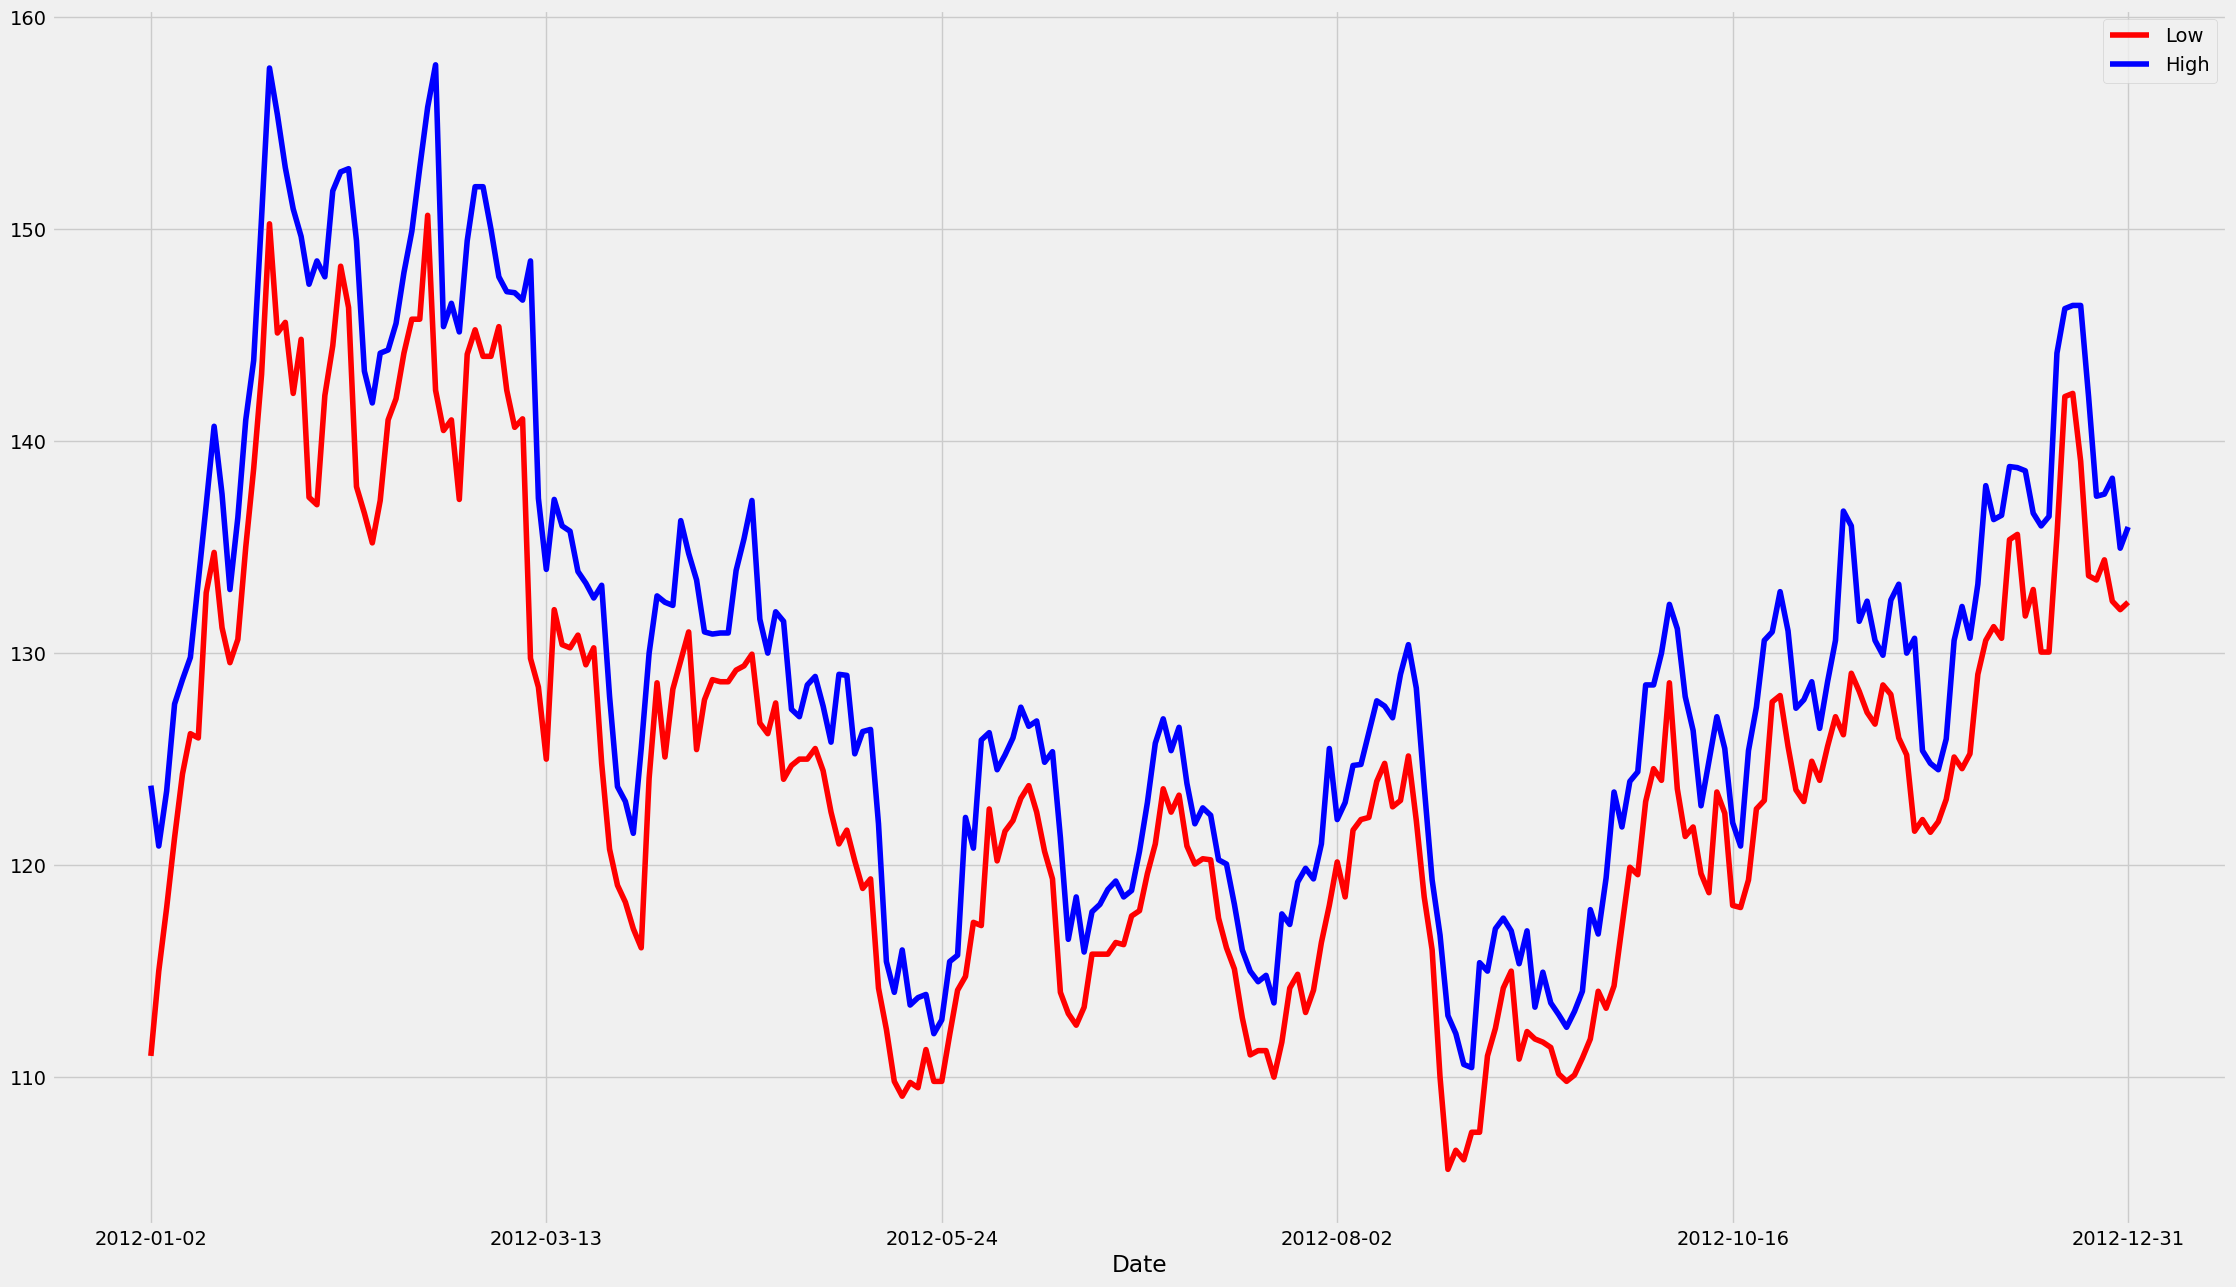

In [28]:
Stockprice_One_Year.plot(x="Date", y=["Low","High"],color=["r","b"],figsize=[25,15])
plt.show()

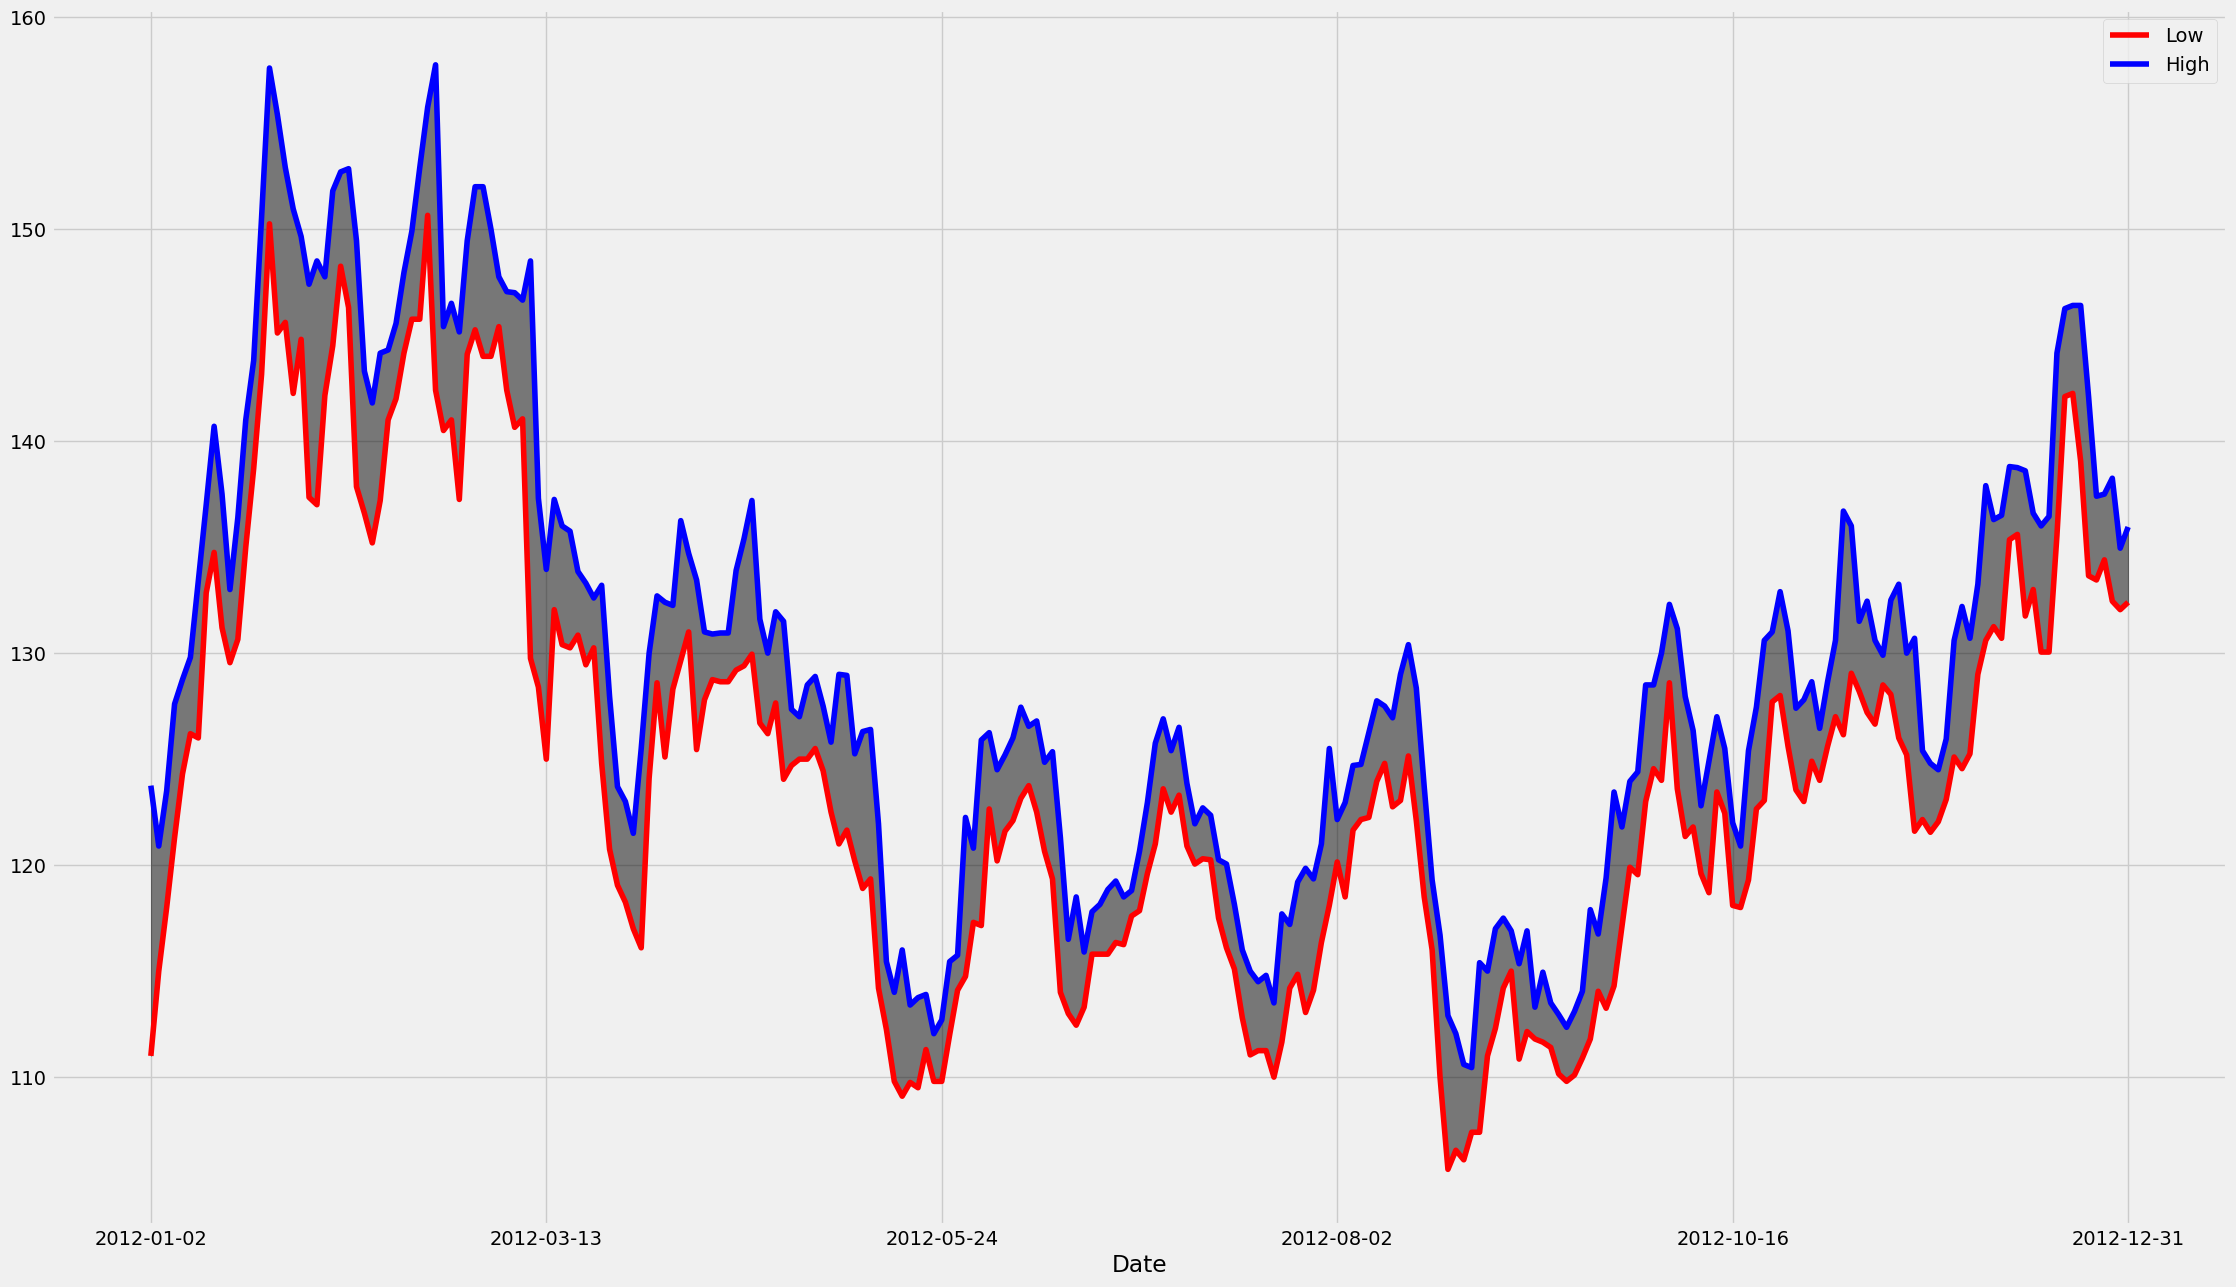

In [29]:
Stockprice_One_Year.plot(x="Date",y=["Low","High"],color = ["r","b"],figsize = [25,15])
plt.fill_between(Stockprice_One_Year["Date"],Stockprice_One_Year["Low"],Stockprice_One_Year["High"],color="k",alpha=0.5)
plt.show()

##### 4.6.Does BoxPlot Signify Something For The Sampled Dataset ?

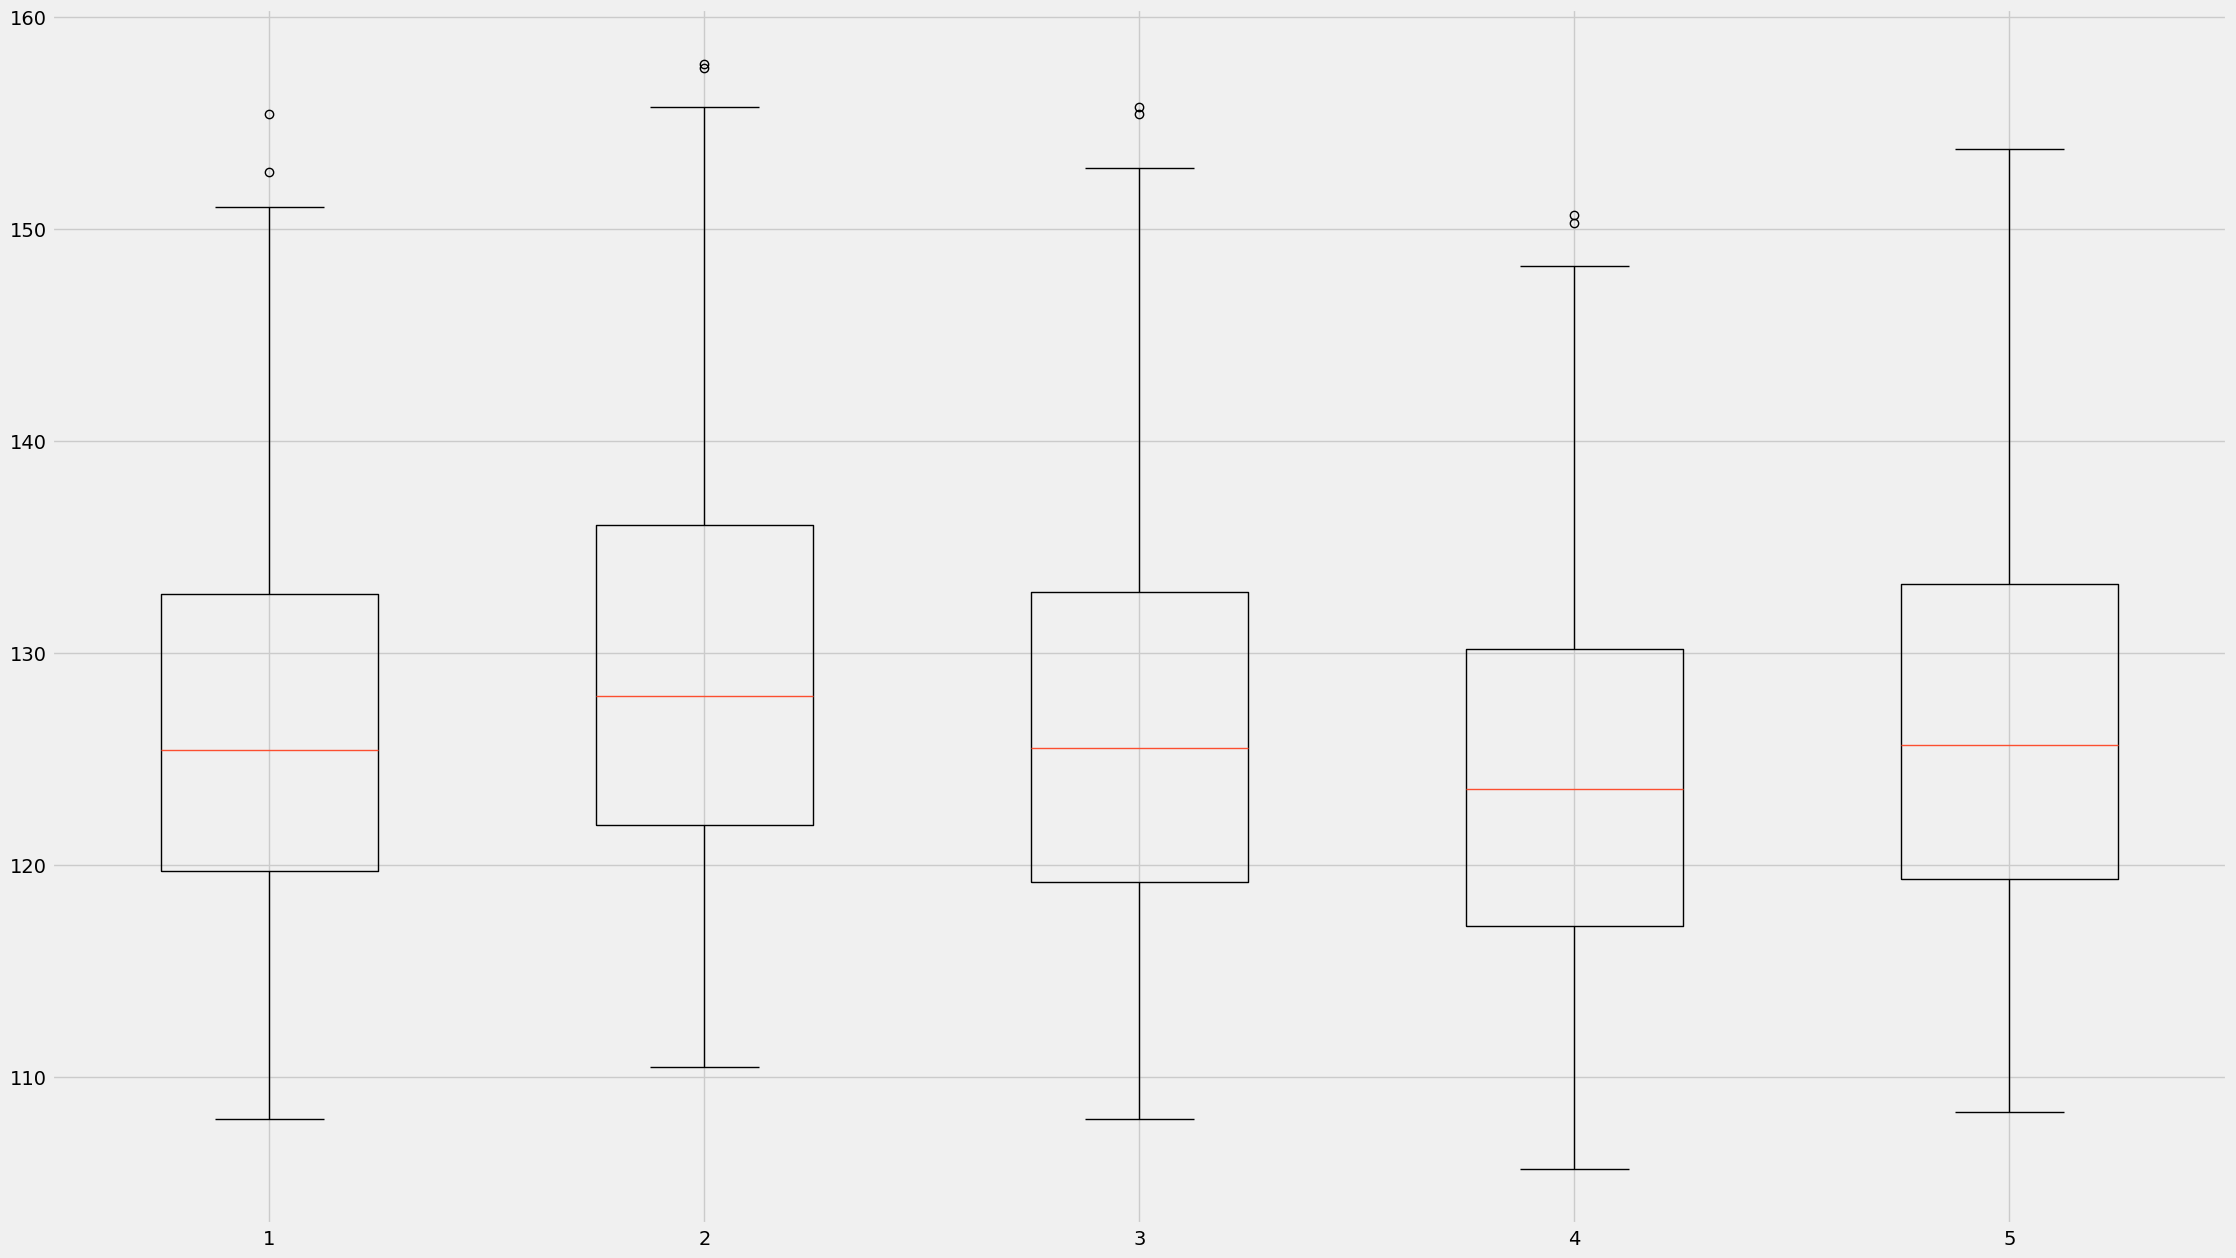

In [30]:
plt.figure(figsize=(25,15))
plt.boxplot(Stockprice_One_Year[['Close',"High","Open","Low","VWAP"]])
plt.show()

# 5. Feature Engineering 

#####  5.1. Generating New Features Based On Important Features

In [31]:
data = df[["Date","Open","High","Low","Volume","VWAP"]]


##### 5.2. Setting Index as Date

In [32]:
df.set_index("Date",drop = False,inplace = True)

##### 5.3. Visual Representation Of Closing Price

<Axes: xlabel='Date'>

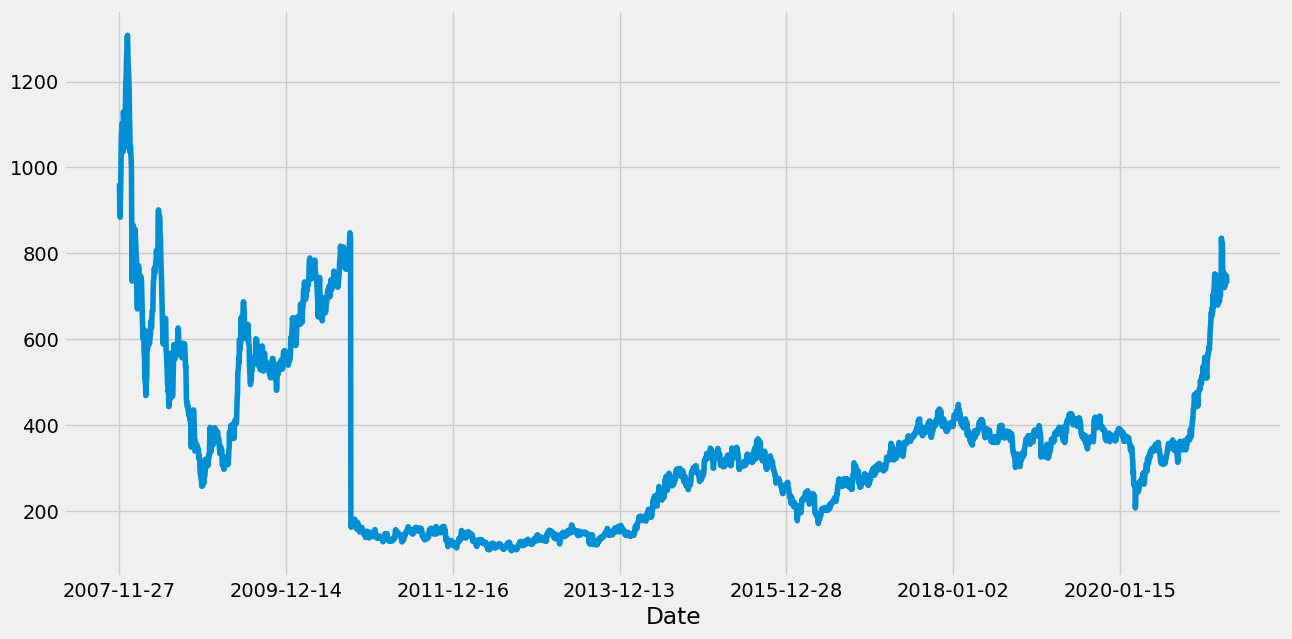

In [33]:
df.Close.plot(figsize=(14,7))

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3322 non-null   object 
 1   Open    3322 non-null   float64
 2   High    3322 non-null   float64
 3   Low     3322 non-null   float64
 4   Volume  3322 non-null   int64  
 5   VWAP    3322 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 155.8+ KB


#####  5.4. Select Data For Regression

In [35]:

X = df[['Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'Volume']].values
y = df['VWAP'].values

In [36]:
X

array([[4.4000000e+02, 7.7000000e+02, 1.0500000e+03, ..., 9.5900000e+02,
        9.6290000e+02, 2.7294366e+07],
       [9.6290000e+02, 9.8400000e+02, 9.9000000e+02, ..., 8.8500000e+02,
        8.9390000e+02, 4.5813380e+06],
       [8.9390000e+02, 9.0900000e+02, 9.1475000e+02, ..., 8.8700000e+02,
        8.8420000e+02, 5.1241210e+06],
       ...,
       [7.4915000e+02, 7.5500000e+02, 7.6000000e+02, ..., 7.4340000e+02,
        7.4625000e+02, 1.1156977e+07],
       [7.4625000e+02, 7.5320000e+02, 7.6585000e+02, ..., 7.4640000e+02,
        7.4675000e+02, 1.3851910e+07],
       [7.4675000e+02, 7.3900000e+02, 7.5945000e+02, ..., 7.2640000e+02,
        7.3005000e+02, 1.2600934e+07]])

In [37]:
y

array([984.72, 941.38, 888.09, ..., 751.02, 753.06, 743.35])

# 6. Linear Regression 

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [39]:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

model = LinearRegression()
model.fit(X_train,y_train)
     

LinearRegression()

In [40]:

print(model.coef_)

[-1.32235469e-02 -5.57413511e-02  4.52540249e-01  3.11198667e-01
 -3.84158379e-01  6.88434813e-01 -3.47794974e-08]


In [41]:

print(model.intercept_)

-0.1375470995865271


In [42]:

Lr_score = model.score(X_test, y_test)
Lr_score

0.9998733668236505

# 7. Gradient Boosting

In [43]:

from sklearn import ensemble
gboost = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2, learning_rate=0.1)
gboost.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=400)

In [44]:

Gboost_score = gboost.score(X_test, y_test)
Gboost_score
     

0.9996680885926408

# 8. XGBoost Regression 

In [45]:
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score


In [46]:
xgb = XGBRegressor()
print(xgb)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [47]:

xgb.fit(X_train, y_train)
xgb.score(X_train, y_train)

0.9999803530758932

In [48]:

XGBoost_score = xgb.score(X_test,y_test)
XGBoost_score

0.9984845469011943

In [49]:
y_predicted = xgb.predict(X_test)
y_predicted

array([ 115.02862 ,  151.3925  ,  342.76944 ,  239.70633 ,  426.22534 ,
        158.03496 ,  892.7399  ,  359.61612 ,  270.28943 ,  151.1534  ,
        556.85016 ,  356.5944  ,  303.59995 ,  595.6932  ,  284.44955 ,
        271.40598 ,  313.6894  , 1203.5887  ,  152.6077  ,  258.32996 ,
        702.4941  ,  260.8454  ,  371.09045 ,  741.5447  ,  355.96826 ,
        749.34064 ,  298.71042 ,  284.13123 ,  154.96664 ,  324.45105 ,
        183.41028 ,  545.2577  ,  382.0177  ,  565.74524 , 1051.9578  ,
        486.69495 ,  220.87892 ,  299.31958 ,  249.7677  ,  149.76532 ,
        344.82837 ,  390.52878 ,  370.9395  ,  123.57635 ,  292.89795 ,
        385.50592 ,  404.27237 ,  556.1089  ,  323.91327 ,  132.2064  ,
        529.76556 ,  139.69894 ,  348.417   ,  136.50916 ,  733.6284  ,
        791.4764  ,  315.82758 ,  122.14139 ,  302.59717 ,  370.51703 ,
        162.9135  ,  312.35117 ,  317.02338 ,  602.8477  ,  128.1985  ,
        112.74617 ,  144.93953 ,  341.84637 ,  513.4415  ,  356.

In [50]:
print("Linear Regression Accuracy : ", Lr_score)
print("Gradient Boost Regression Accuracy : ", Gboost_score)
print("XGBoost Regression Accuracy : ", XGBoost_score)

Linear Regression Accuracy :  0.9998733668236505
Gradient Boost Regression Accuracy :  0.9996680885926408
XGBoost Regression Accuracy :  0.9984845469011943


In [52]:
import warnings 
warnings.filterwarnings('ignore')

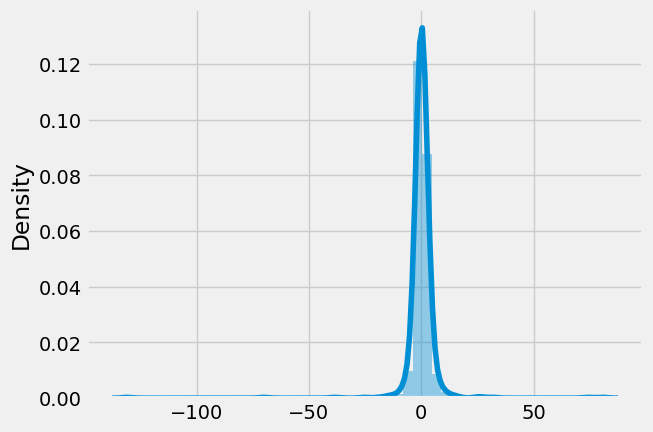

In [53]:
sns.distplot((y_test-y_predicted),bins=50);